<a href="https://colab.research.google.com/github/pozueco/bq_training/blob/main/bigquery_for_ga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data extract from Google Analytics in BigQuery

Both Universal Analytics and GA4 allow for the automatic extraction of data from Google Analytics to BigQuery. The following steps can be taken to achieve this, and more information about the available data can be found in the next two sections.

# BigQuery extract for UA

In order to enable the BigQuery extract from Universal Analytics into BigQuery, these are the steps to follow:

1. Create a Google API Console project and enable the BigQuery API

2. Prepare a project for BigQuery export with billing enabled

3. Prepare your BigQuery Dataset for EU storage if needed

4. Add the following service account with edit access to the Cloud Project:

   analytics-processing-dev@system.gserviceaccount.com

5. Link BigQuery to Google Analytics 360 in the Google Analytics admin

For more information about the linking process, you can visit the following link:

https://support.google.com/analytics/answer/3416092?hl=en#zippy=%2Cin-this-article

## BigQuery export schema

Once Universal Analytics has been linked to BigQuery, a daily table in the format "ga_sessions_YYYYMMDD" will be exported to BigQuery every day. Intraday data is also imported at least three times a day with the format "ga_sessions_intraday_YYYYMMDD". During the same day, each import of intraday data overwrites the previous import in the same table.

The columns within the export are listed below. In BigQuery, some columns may have nested fields and messages within them:

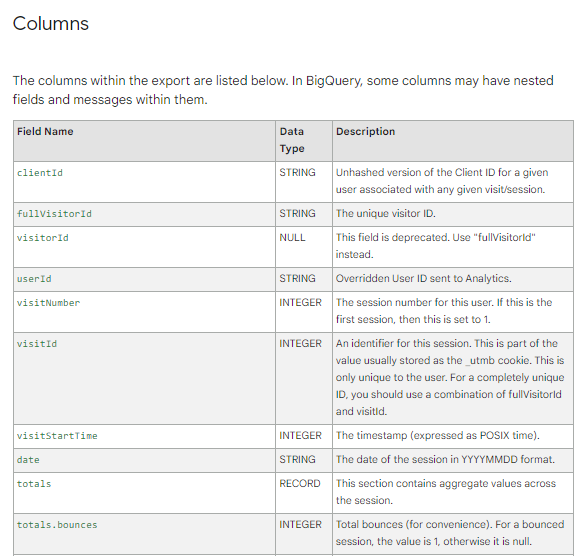

For more information about the schema of the data you can visit the following link:

https://support.google.com/analytics/answer/3437719?hl=en

# BigQuery extract for GA4

In order to enable the BigQuery extract from GA4 into BigQuery, it is necessary to following the following steps:

1. Create a Google-APIs-Console project and enable BigQuery

2. Prepare your project for BigQuery Export

3. Link a Google Analytics 4 property to BigQuery

4. Verify that the following service account has been added to the Google Cloud project, as a BigQuery Job User:

   firebase-measurement@system.gserviceaccount.com

For more information about the connection between GA4 and BigQuery, you can visit the following link:

https://support.google.com/analytics/answer/9823238?hl=en#zippy=%2Cin-this-article

## BigQuery export schema

For each Google Analytics 4 property and each Firebase project that is linked to BigQuery, a single dataset named "analytics_<property_id>" is added to the BigQuery project. Property ID refers to your Analytics Property ID, which you can find in the property settings for your Google Analytics 4 property, and in App Analytics Settings in Firebase. Each Google Analytics 4 property and each app for which BigQuery exporting is enabled will export its data to that single dataset. 

Within each dataset, a table named "events_YYYYMMDD" is created each day if the daily export option is enabled. 

If the streaming export option is enabled, a table named "events_intraday_YYYYMMDD" is created. This table is populated continuously as events are recorded throughout the day. This table is deleted at the end of each day once "events_YYYYMMDD" is complete.

Data for a single event may be represented in one or multiple rows, depending on whether it contains repeated RECORDS, with the following information:

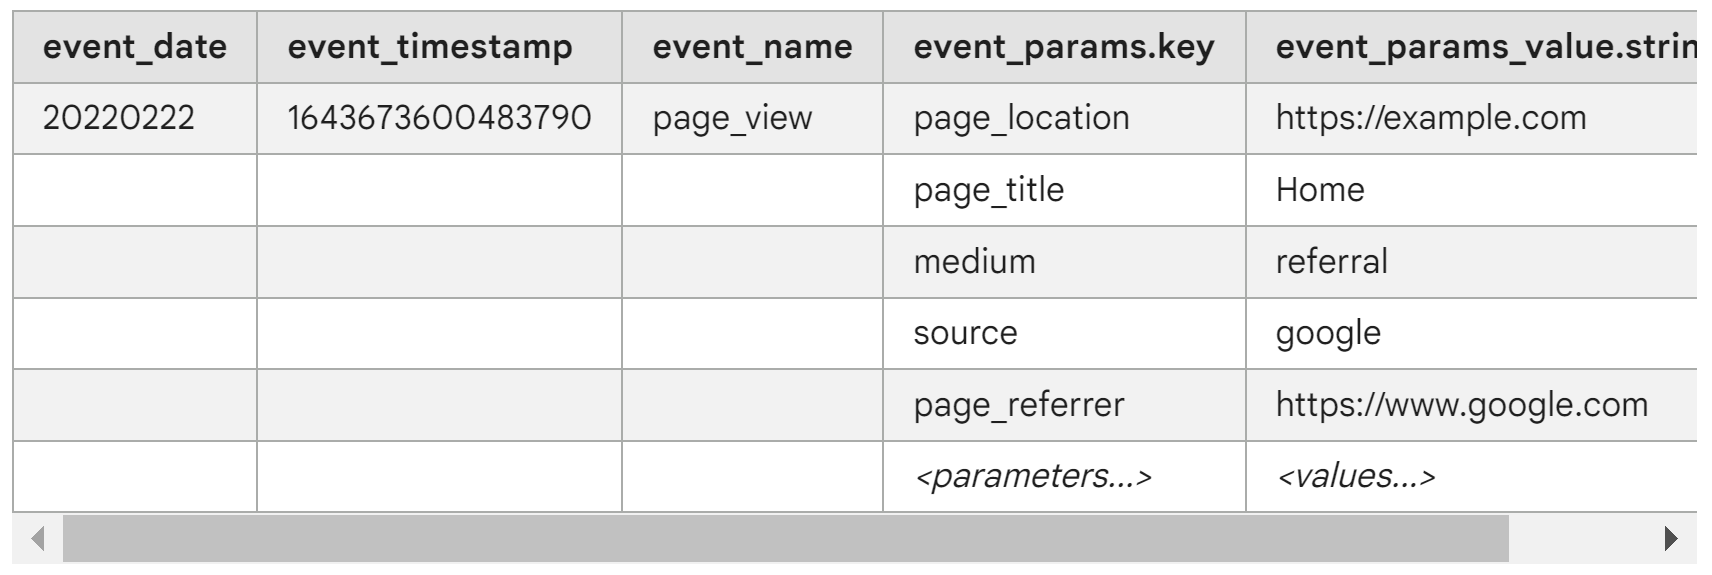

For more information about the BigQuery schema for the GA4 extract, please visit the following link:

https://support.google.com/analytics/answer/7029846?hl=en